In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Datos_limpieza.csv",delimiter=";")
print(df.to_string())


         Fecha  Dias_Transcurridos  Peso  Grasa %  Musculo %   BMI  Grasa visceral  Metabolismo  Agua
0   2023-06-28                   1  78.9     24.6       56.7  26.7           12.00       1692.0  53.7
1   2023-07-06                   9  77.8     24.6       55.8  26.3           12.00       1662.0  53.5
2   2023-07-09                  12  77.7     24.2       56.1  26.3           11.50       1672.0  53.8
3   2023-07-14                  17  77.3     23.9       56.1  26.1           11.50       1670.0  54.0
4   2023-07-16                  19  77.5     24.1       56.0  26.2           11.50       1669.0  53.9
5   2023-07-17                  20  77.9     24.0       56.5  26.3           11.50       1684.0  54.0
6   2023-07-21                  24  77.1     24.2       55.5  26.1           12.00       1653.0  53.7
7   2023-07-22                  25  76.7     24.0       55.3  25.9           11.50       1647.0  53.8
8   2023-07-23                  26  76.5     23.8       55.4  25.9           11.50

## **ANALISIS EXPLORATORIO**

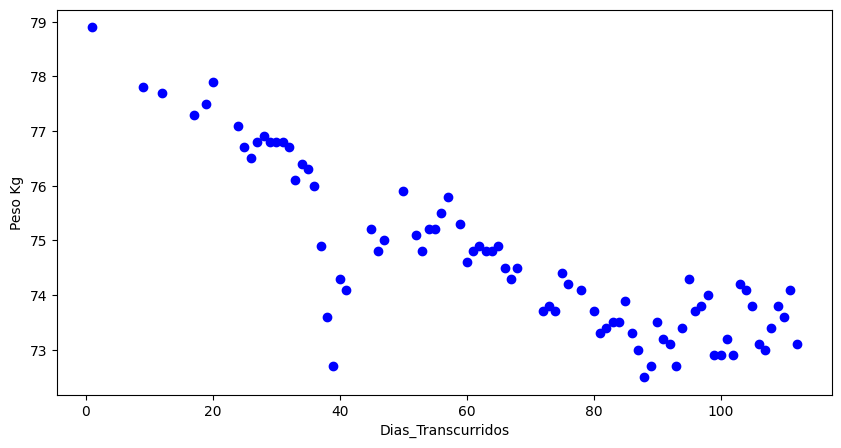

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.ylabel("Peso Kg")
plt.xlabel("Dias_Transcurridos")
plt.scatter(df["Dias_Transcurridos"], df["Peso"], color="blue")
plt.show()

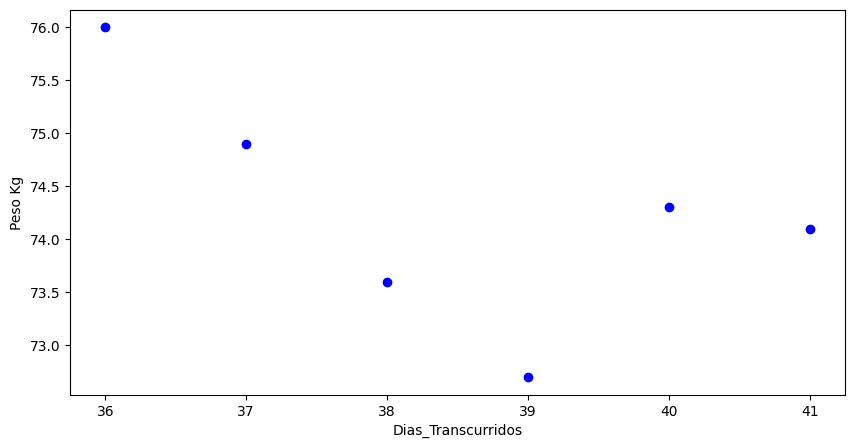

In [6]:
# Se detecta un descenso y ascenso de peso muy bruscos en una brecha de 5 dias al rededor del dia 40

df_revision = df[18:24]
plt.figure(figsize=(10, 5))
plt.ylabel("Peso Kg")
plt.xlabel("Dias_Transcurridos")
plt.scatter(df_revision["Dias_Transcurridos"], df_revision["Peso"], color="blue")
plt.show()

In [7]:
# Se eliminan esos registros atipicos para lograr un ajuste mas preciso del modelo
df = df.drop(range(19, 24))

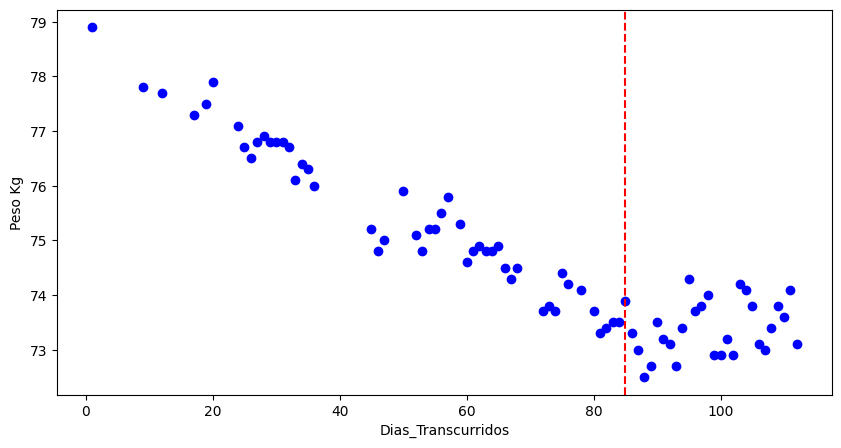

In [8]:
# Muestro los registros ya recortados y dibujo una posible segmentacion del dataset
plt.figure(figsize=(10, 5))
plt.ylabel("Peso Kg")
plt.xlabel("Dias_Transcurridos")
plt.scatter(df["Dias_Transcurridos"], df["Peso"], color="blue")
plt.axvline(x=df["Dias_Transcurridos"][55], color="red", linestyle="--", label="Línea Vertical")
plt.show()

In [9]:
# SEPARO LOS DATASETS..
# LOS PRIMEROS 41 REGISTROS CORRESPONDEN A LAS MEDICIONES SIGUIENDO UN PLAN DE ENTRENAMIENTO
df_con_entrenamiento = df[:55]

# A PARTIR DEL REGISTRO 41 NO SE SIGUIO PLAN DE ENTRENAMIENTO
df_sin_entrenamiento = df[55:]

## **MUESTREO DE DATOS**

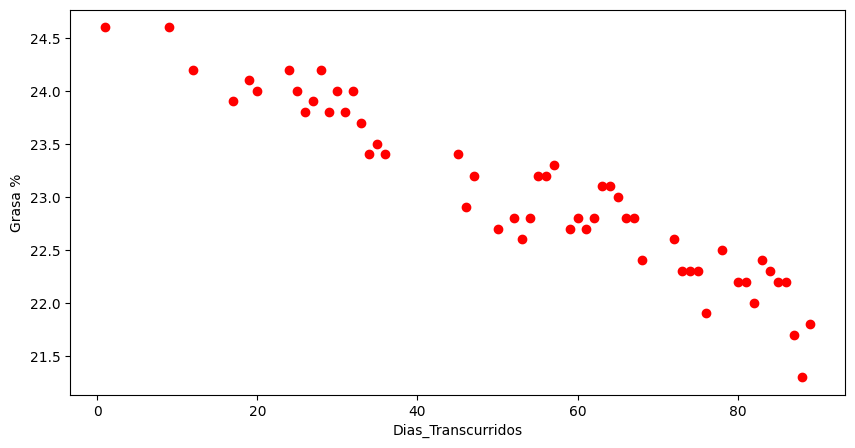

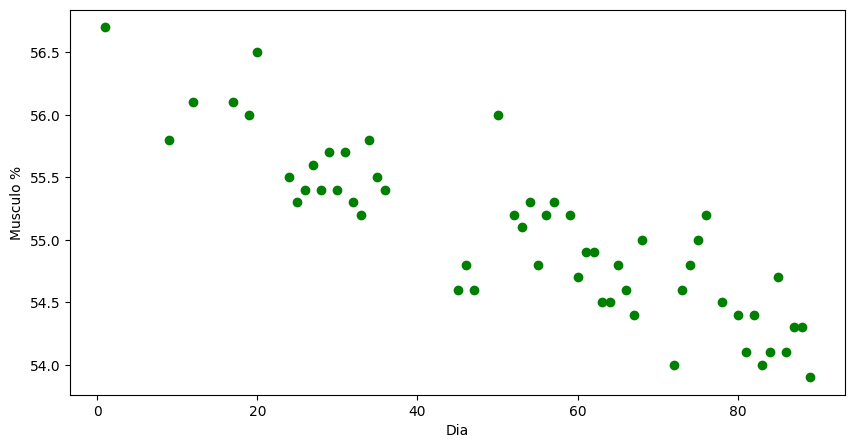

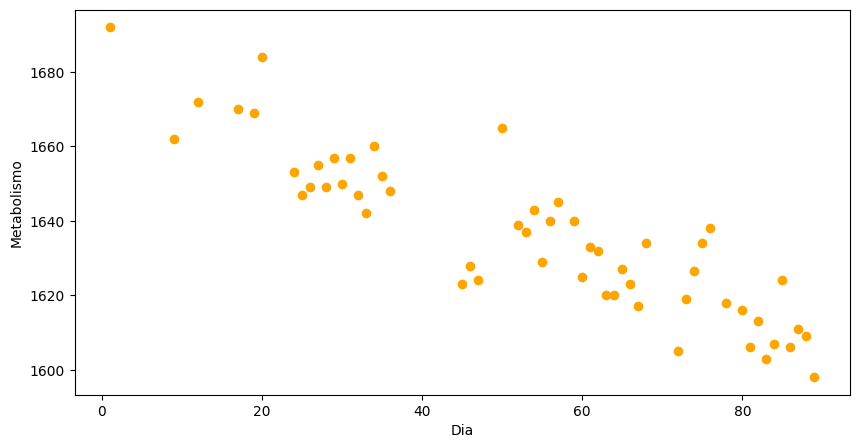

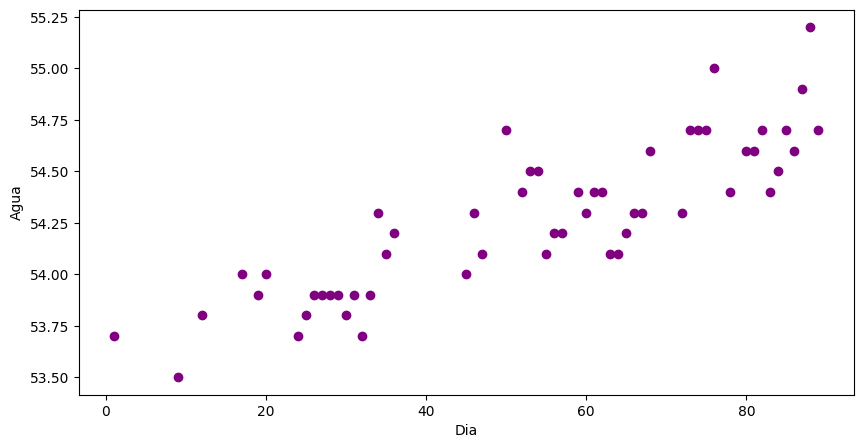

In [10]:
import matplotlib.pyplot as plt

# ANALISIS SOBRE LOS REGISTROS DONDE SE SIGUIO EL PLAN DE ENTRENAMIENTO

# GRASA
plt.figure(figsize=(10, 5))
plt.ylabel("Grasa %")
plt.xlabel("Dias_Transcurridos")
plt.scatter(df_con_entrenamiento["Dias_Transcurridos"], df_con_entrenamiento["Grasa %"], color="red")
plt.show()

# MUSCULO %
plt.figure(figsize=(10, 5))
plt.ylabel("Musculo %")
plt.xlabel("Dia")
plt.scatter(df_con_entrenamiento["Dias_Transcurridos"], df_con_entrenamiento["Musculo %"], color="green")
plt.show()

# METABOLISMO
plt.figure(figsize=(10, 5))
plt.ylabel("Metabolismo")
plt.xlabel("Dia")
plt.scatter(df_con_entrenamiento["Dias_Transcurridos"], df_con_entrenamiento["Metabolismo"], color="orange")
plt.show()

# AGUA
plt.figure(figsize=(10, 5))
plt.ylabel("Agua")
plt.xlabel("Dia")
plt.scatter(df_con_entrenamiento["Dias_Transcurridos"], df_con_entrenamiento["Agua"], color="purple")
plt.show()

## **GENERACION DE MODELOS**

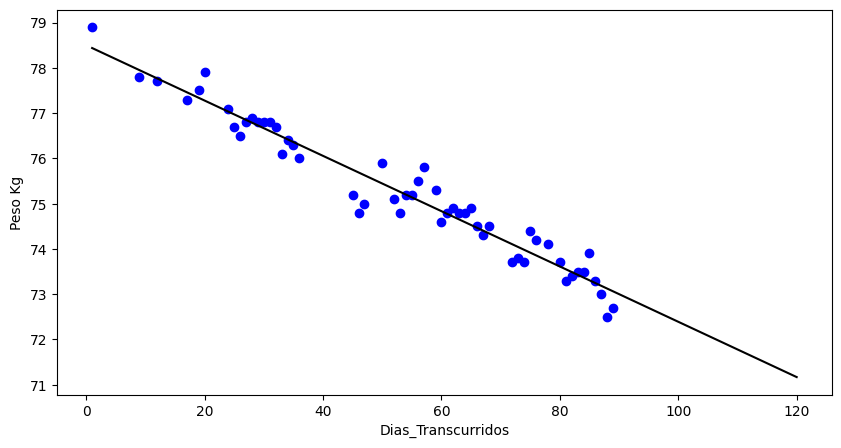

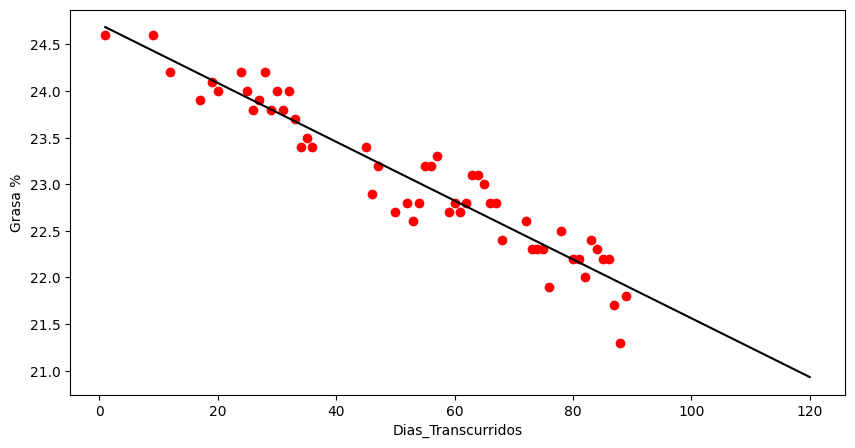

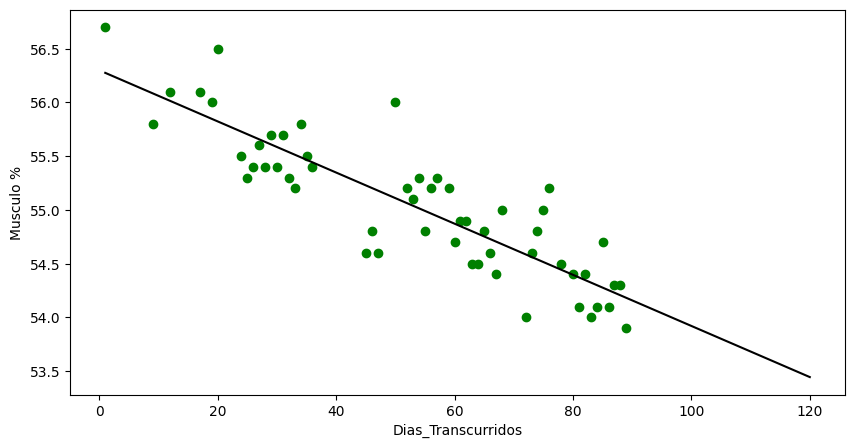

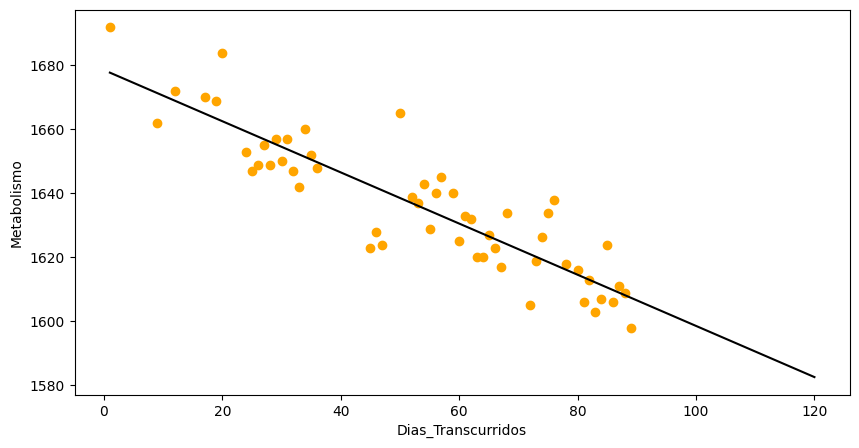

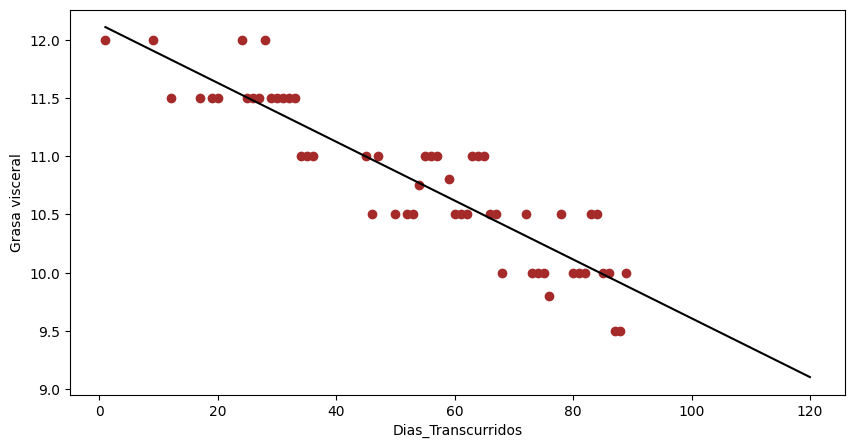

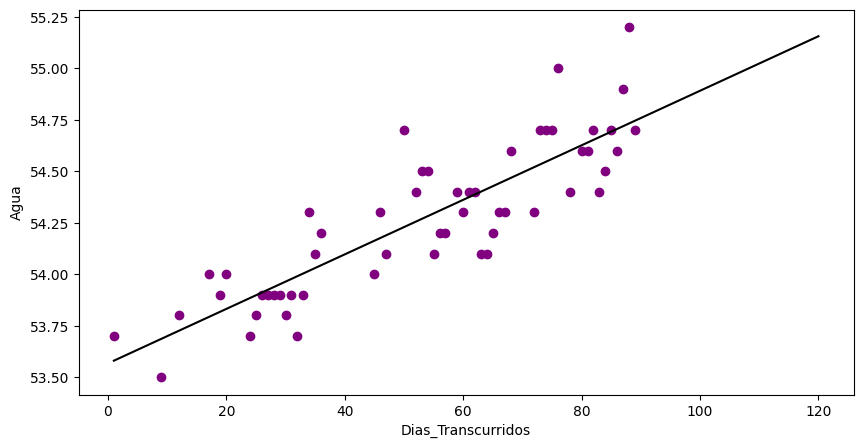

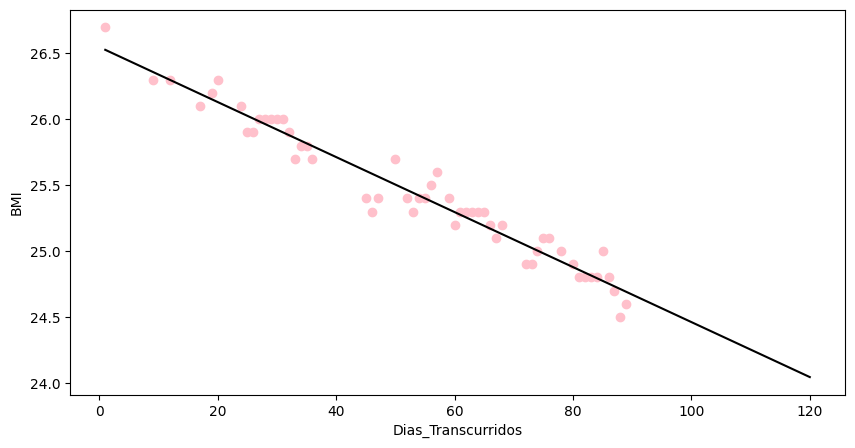

In [11]:
import matplotlib.pyplot as plt
from sklearn import linear_model

# Puntos para generar las rectas
entrada = [[1], [20], [120]]
dias = df_con_entrenamiento["Dias_Transcurridos"].values.reshape((-1, 1)) # Este método se usa para convertir la serie de pandas en un arreglo NumPy.


# PESO
regresion_peso = linear_model.LinearRegression()
modelo_peso = regresion_peso.fit(dias, df_con_entrenamiento["Peso"])
# Grafico
plt.figure(figsize=(10, 5))
plt.ylabel("Peso Kg")
plt.xlabel("Dias_Transcurridos")
plt.scatter(df_con_entrenamiento["Dias_Transcurridos"], df_con_entrenamiento["Peso"], color="blue")
plt.plot(entrada, modelo_peso.predict(entrada), color="black")
plt.show()


# GRASA
regresion_grasa = linear_model.LinearRegression()
modelo_grasa = regresion_grasa.fit(dias, df_con_entrenamiento["Grasa %"])
# Grafico
plt.figure(figsize=(10, 5))
plt.ylabel("Grasa %")
plt.xlabel("Dias_Transcurridos")
plt.scatter(df_con_entrenamiento["Dias_Transcurridos"], df_con_entrenamiento["Grasa %"], color="red")
plt.plot(entrada, modelo_grasa.predict(entrada), color="black") #recta
plt.show()


# MUSCULO
regresion_musculo = linear_model.LinearRegression()
modelo_musculo = regresion_musculo.fit(dias, df_con_entrenamiento["Musculo %"])
# Grafico
plt.figure(figsize=(10, 5))
plt.ylabel("Musculo %")
plt.xlabel("Dias_Transcurridos")
plt.scatter(df_con_entrenamiento["Dias_Transcurridos"], df_con_entrenamiento["Musculo %"], color="green")
plt.plot(entrada, modelo_musculo.predict(entrada), color="black") #recta
plt.show()


# METABOLISMO
regresion_metabolismo = linear_model.LinearRegression()
modelo_metabolismo = regresion_metabolismo.fit(dias, df_con_entrenamiento["Metabolismo"])
# Grafico
plt.figure(figsize=(10, 5))
plt.ylabel("Metabolismo")
plt.xlabel("Dias_Transcurridos")
plt.scatter(df_con_entrenamiento["Dias_Transcurridos"], df_con_entrenamiento["Metabolismo"], color="orange")
plt.plot(entrada, modelo_metabolismo.predict(entrada), color="black") #recta
plt.show()


# GRASA VISCERAL
regresion_grasa_visceral = linear_model.LinearRegression()
modelo_grasa_visceral = regresion_grasa_visceral.fit(dias, df_con_entrenamiento["Grasa visceral"])
# Grafico
plt.figure(figsize=(10, 5))
plt.ylabel("Grasa visceral")
plt.xlabel("Dias_Transcurridos")
plt.scatter(df_con_entrenamiento["Dias_Transcurridos"], df_con_entrenamiento["Grasa visceral"], color="brown")
plt.plot(entrada, modelo_grasa_visceral.predict(entrada), color="black") #recta
plt.show()


# AGUA
regresion_agua = linear_model.LinearRegression()
modelo_agua = regresion_agua.fit(dias, df_con_entrenamiento["Agua"])
# Grafico
plt.figure(figsize=(10, 5))
plt.ylabel("Agua")
plt.xlabel("Dias_Transcurridos")
plt.scatter(df_con_entrenamiento["Dias_Transcurridos"], df_con_entrenamiento["Agua"], color="purple")
plt.plot(entrada, modelo_agua.predict(entrada), color="black") #recta
plt.show()


# INDICE DE MASA CORPORAL BMI
regresion_bmi = linear_model.LinearRegression()
modelo_bmi = regresion_bmi.fit(dias, df_con_entrenamiento["BMI"])
# Grafico
plt.figure(figsize=(10, 5))
plt.ylabel("BMI")
plt.xlabel("Dias_Transcurridos")
plt.scatter(df_con_entrenamiento["Dias_Transcurridos"], df_con_entrenamiento["BMI"], color="pink")
plt.plot(entrada, modelo_bmi.predict(entrada), color="black") #recta
plt.show()


## **PREDICCIONES**

Estableceremos fechas a futuro para predecir cada uno de los componentes de la composicion corporal

In [12]:
# Predeciremos la composicion corporal para los dias 180, 270, 365
dias_prediccion = [[160],[190],[220],[250]]

print("Prediccion para Diciembre 2023 (dia 160)")
print("*********************************************************")
print("Peso:",modelo_peso.predict(dias_prediccion)[0])
print("Grasa %:",modelo_grasa.predict(dias_prediccion)[0])
print("Musculo %:",modelo_musculo.predict(dias_prediccion)[0])
print("Metabolismo:",modelo_metabolismo.predict(dias_prediccion)[0])
print("Grasa visceral:",modelo_grasa_visceral.predict(dias_prediccion)[0])
print("Agua:",modelo_agua.predict(dias_prediccion)[0])
print("BMI:",modelo_bmi.predict(dias_prediccion)[0])
print()

print("Prediccion para Enero 2024 (dia 190)")
print("*********************************************************")
print("Peso:",modelo_peso.predict(dias_prediccion)[1])
print("Grasa %:",modelo_grasa.predict(dias_prediccion)[1])
print("Musculo %:",modelo_musculo.predict(dias_prediccion)[1])
print("Metabolismo:",modelo_metabolismo.predict(dias_prediccion)[1])
print("Grasa visceral:",modelo_grasa_visceral.predict(dias_prediccion)[1])
print("Agua:",modelo_agua.predict(dias_prediccion)[1])
print("BMI:",modelo_bmi.predict(dias_prediccion)[1])
print()


print("Prediccion para Febrero 2024 (dia 220)")
print("*********************************************************")
print("Peso:",modelo_peso.predict(dias_prediccion)[2])
print("Grasa %:",modelo_grasa.predict(dias_prediccion)[2])
print("Musculo %:",modelo_musculo.predict(dias_prediccion)[2])
print("Metabolismo:",modelo_metabolismo.predict(dias_prediccion)[2])
print("Grasa visceral:",modelo_grasa_visceral.predict(dias_prediccion)[2])
print("Agua:",modelo_agua.predict(dias_prediccion)[2])
print("BMI:",modelo_bmi.predict(dias_prediccion)[2])
print()

print("Prediccion para Marzo 2024 (dia 250)")
print("*********************************************************")
print("Peso:",modelo_peso.predict(dias_prediccion)[3])
print("Grasa %:",modelo_grasa.predict(dias_prediccion)[3])
print("Musculo %:",modelo_musculo.predict(dias_prediccion)[3])
print("Metabolismo:",modelo_metabolismo.predict(dias_prediccion)[3])
print("Grasa visceral:",modelo_grasa_visceral.predict(dias_prediccion)[3])
print("Agua:",modelo_agua.predict(dias_prediccion)[3])
print("BMI:",modelo_bmi.predict(dias_prediccion)[3])
print()


Prediccion para Diciembre 2023 (dia 160)
*********************************************************
Peso: 68.72536725980976
Grasa %: 19.667914104411558
Musculo %: 52.494712392945814
Metabolismo: 1550.5834511795522
Grasa visceral: 8.093400095989686
Agua: 55.68518845274434
BMI: 23.208891949711678

Prediccion para Enero 2024 (dia 190)
*********************************************************
Peso: 66.89294341513087
Grasa %: 18.72107394008469
Musculo %: 51.781565075635676
Metabolismo: 1526.587474688851
Grasa visceral: 7.335819888549201
Agua: 56.08246489136349
BMI: 22.582753677853006

Prediccion para Febrero 2024 (dia 220)
*********************************************************
Peso: 65.060519570452
Grasa %: 17.77423377575782
Musculo %: 51.06841775832554
Metabolismo: 1502.5914981981498
Grasa visceral: 6.578239681108716
Agua: 56.479741329982645
BMI: 21.95661540599433

Prediccion para Marzo 2024 (dia 250)
*********************************************************
Peso: 63.228095725773116
Gras

In [13]:
print("Modelo Peso Pendiente (m):", modelo_peso.coef_[0])
print("Modelo Grasa Pendiente (m):", modelo_grasa.coef_[0])
print("Modelo Musculo % Pendiente (m):", modelo_musculo.coef_[0])
print("Modelo Metabolismo Pendiente (m):", modelo_metabolismo.coef_[0])
print("Modelo Grasa visceral Pendiente (m):", modelo_grasa_visceral.coef_[0])
print("Modelo Agua Pendiente (m):", modelo_agua.coef_[0])
print("BMI Pendiente (m):", modelo_bmi.coef_[0])

Modelo Peso Pendiente (m): -0.06108079482262927
Modelo Grasa Pendiente (m): -0.031561338810895644
Modelo Musculo % Pendiente (m): -0.02377157724367133
Modelo Metabolismo Pendiente (m): -0.7998658830233712
Modelo Grasa visceral Pendiente (m): -0.025252673581349507
Modelo Agua Pendiente (m): 0.01324254795397168
BMI Pendiente (m): -0.02087127572862244


**INDICADORES DE RENDIMIENTO**

Utilizaremos las pendientes de las rectas generadas con las regresiones lineales para generar indices representativos de la velocidad de perdida o aumento de los valores de cada componente de la composicion corporal.

Generando una "puntuacion" del periodo de entrenamiento evaluado



INDICADORES DEL PERIODO EVALUADO
Cuanto mas alto es el indicador.. el valor esta subiendo con mas rapidez, cuanto mas bajo.. disminuye con mas rapidez
Un valor cercano a 0 significa que el valor se mantendria sin modificaciones

Indicador de peso: -6
Indicador de Grasa %: -3
Indicador de Musculo %: -2
Indicador de Metabolismo: -80
Indicador de Grasa visceral: -3
Indicador de Agua: 1
Indicador de BMI: -2


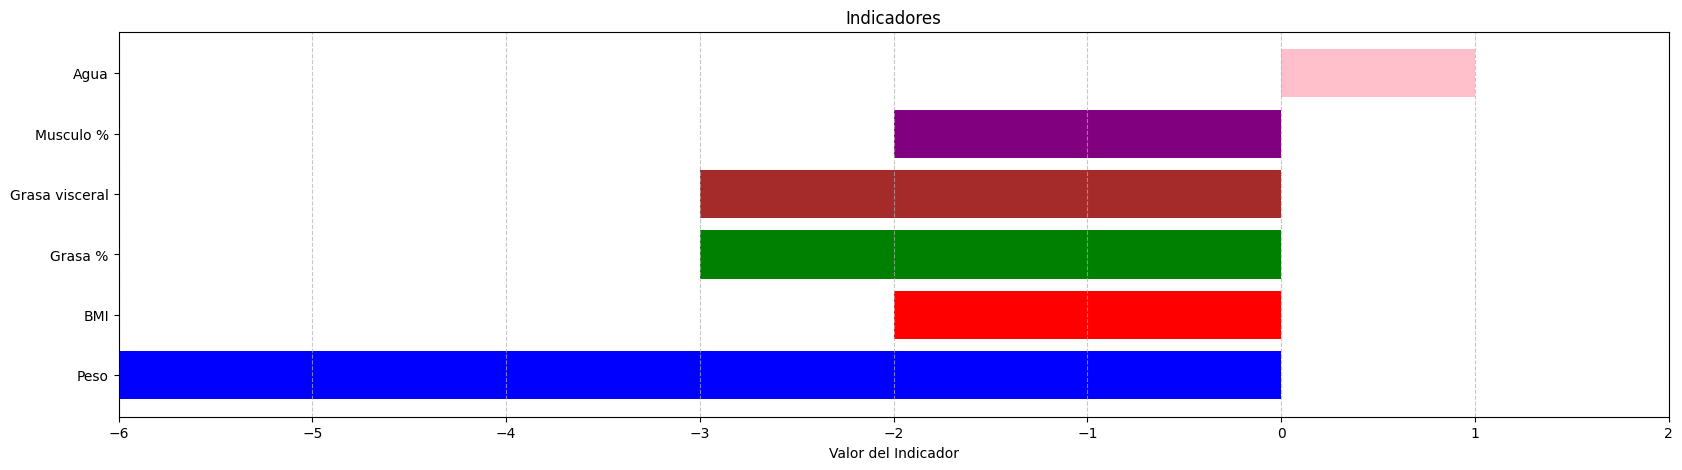

In [14]:
indicador_peso = round(modelo_peso.coef_[0] * 100)
indicador_grasa = round(modelo_grasa.coef_[0] * 100)
indicador_musculo = round(modelo_musculo.coef_[0] * 100)
indicador_metabolismo = round(modelo_metabolismo.coef_[0] * 100)
indicador_grasa_visceral = round(modelo_grasa_visceral.coef_[0] * 100)
indicador_agua = round(modelo_agua.coef_[0] * 100)
indicador_bmi = round(modelo_bmi.coef_[0] * 100)


print("INDICADORES DEL PERIODO EVALUADO")
print("Cuanto mas alto es el indicador.. el valor esta subiendo con mas rapidez, cuanto mas bajo.. disminuye con mas rapidez")
print("Un valor cercano a 0 significa que el valor se mantendria sin modificaciones")
print()
print("Indicador de peso:", str(indicador_peso))
print("Indicador de Grasa %:", str(indicador_grasa))
print("Indicador de Musculo %:", str(indicador_musculo))
print("Indicador de Metabolismo:", str(indicador_metabolismo))
print("Indicador de Grasa visceral:", str(indicador_grasa_visceral))
print("Indicador de Agua:", str(indicador_agua))
print("Indicador de BMI:", str(indicador_bmi))


indicadores = ["Peso", "BMI", "Grasa %",  "Grasa visceral", "Musculo %","Agua"]
valores = [indicador_peso, indicador_bmi, indicador_grasa, indicador_grasa_visceral,indicador_musculo, indicador_agua]

plt.figure(figsize=(20, 5))
plt.barh(indicadores, valores, color=['blue', 'red', 'green', 'brown', 'purple', 'pink'])
plt.xlabel("Valor del Indicador")
plt.title("Indicadores")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xlim(-6, 2)
plt.show()
